# <center>Mice Protein Expression Data Set</center>


## Data Description

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
* c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
* c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
* c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
* c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
* t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
* t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
* t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
* t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

## Project Objective
The aim is to identify subsets of proteins that are discriminant between the classes.

### Task 1: Retrieving and Preparation of data

In [1]:
# Importing the required numpy,pandas and matplotlib,seaborn packages for Processing and visualizing the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file "Data_Cortex_Nuclear" separated by ','. Displaying all the columns.

pd.options.display.max_columns = None
data="Data_Cortex_Nuclear.csv"
df= pd.read_csv(data,sep=',')

In [3]:
#checking the shape of the dataset
df.shape

(1080, 82)

In [4]:
#displaying the first 5 rows
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

**Removing ID** like columns as it is not required for our analysis. In our data set `MouseID` is removed from the dataset.

In [5]:
df = df.drop(columns='MouseID')

Checking the missing values in the entire data set.

In [6]:
df.columns[df.isnull().any()].tolist()

['DYRK1A_N',
 'ITSN1_N',
 'BDNF_N',
 'NR1_N',
 'NR2A_N',
 'pAKT_N',
 'pBRAF_N',
 'pCAMKII_N',
 'pCREB_N',
 'pELK_N',
 'pERK_N',
 'pJNK_N',
 'PKCA_N',
 'pMEK_N',
 'pNR1_N',
 'pNR2A_N',
 'pNR2B_N',
 'pPKCAB_N',
 'pRSK_N',
 'AKT_N',
 'BRAF_N',
 'CAMKII_N',
 'CREB_N',
 'ELK_N',
 'ERK_N',
 'GSK3B_N',
 'JNK_N',
 'MEK_N',
 'TRKA_N',
 'RSK_N',
 'APP_N',
 'Bcatenin_N',
 'SOD1_N',
 'MTOR_N',
 'P38_N',
 'pMTOR_N',
 'DSCR1_N',
 'AMPKA_N',
 'NR2B_N',
 'pNUMB_N',
 'RAPTOR_N',
 'TIAM1_N',
 'pP70S6_N',
 'BAD_N',
 'BCL2_N',
 'pCFOS_N',
 'H3AcK18_N',
 'EGR1_N',
 'H3MeK4_N']

### Missing Values
Replacing all missing values in the data set with mean of the corresponding column. 

In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
#checking whether all missing values have been replaced
df.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

Looked for Sanity checks, extra spacing, typo error checks. But in this data set no errors found 

In [9]:
Numerical_cols = df.columns[df.dtypes == np.number].tolist()     # Getting the list of Numerical variables in the dataframe.
categorical_cols = df.columns[df.dtypes == np.object].tolist()   # Getting the list of Categorical variables in the dataframe.

In [10]:
# checking the unique values and there counts in all categorical columns
for categorical_col in categorical_cols:
    print(categorical_col)
    print(df[categorical_col].value_counts(dropna=False))
    print('\n')

Genotype
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Treatment
Memantine    570
Saline       510
Name: Treatment, dtype: int64


Behavior
S/C    555
C/S    525
Name: Behavior, dtype: int64


class
c-CS-m    150
c-SC-m    150
t-SC-s    135
t-SC-m    135
c-CS-s    135
t-CS-m    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64




In [11]:
#displaying top 3 rows
df.head(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m


## Summary Statistics
Summary of the entire data set is obtained to know the data well for futher analysis.

In [12]:
df.describe(include = np.number).round(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00
mean,0.43,0.62,0.32,2.30,3.84,0.23,0.18,3.54,0.21,1.43,0.55,0.31,0.32,0.28,0.83,0.73,1.56,1.53,0.44,0.68,0.38,0.36,0.18,1.17,2.47,1.17,0.24,0.27,0.69,0.17,0.40,2.15,0.54,0.45,0.42,0.76,0.59,0.37,0.57,0.36,0.32,0.42,0.39,0.18,0.94,0.16,1.71,0.29,0.43,1.20,0.22,0.17,0.18,0.12,0.16,0.18,0.21,0.12,0.22,0.13,0.53,0.29,1.55,2.24,0.16,1.24,0.85,0.23,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.34
std,0.25,0.25,0.05,0.35,0.93,0.04,0.03,1.29,0.03,0.47,0.34,0.05,0.05,0.05,0.12,0.19,0.27,0.48,0.07,0.13,0.22,0.05,0.03,0.33,0.65,0.24,0.03,0.04,0.12,0.03,0.06,0.43,0.28,0.07,0.09,0.12,0.10,0.06,0.09,0.06,0.05,0.07,0.16,0.03,0.17,0.02,0.58,0.04,0.14,0.36,0.19,0.03,0.02,0.01,0.02,0.02,0.07,0.01,0.03,0.03,0.08,0.03,0.25,0.25,0.02,0.17,0.09,0.03,0.03,0.02,0.01,0.02,0.07,0.05,0.04,0.05,0.32
min,0.15,0.25,0.12,1.33,1.74,0.06,0.06,1.34,0.11,0.43,0.15,0.05,0.19,0.06,0.50,0.28,0.30,0.57,0.10,0.06,0.14,0.21,0.11,0.50,1.13,0.15,0.05,0.15,0.20,0.11,0.24,1.13,0.22,0.20,0.23,0.17,0.16,0.23,0.18,0.19,0.19,0.24,0.13,0.12,0.34,0.10,0.60,0.18,0.13,0.53,0.05,-0.06,0.07,0.07,0.10,0.10,0.10,0.09,0.11,0.07,0.28,0.21,0.85,1.21,0.10,0.75,0.58,0.16,0.09,0.08,0.07,0.09,0.26,0.08,0.11,0.10,0.59
25%,0.29,0.47,0.29,2.06,3.16,0.21,0.16,2.48,0.19,1.21,0.34,0.28,0.28,0.24,0.74,0.59,1.38,1.17,0.40,0.60,0.26,0.33,0.16,0.95,1.99,1.02,0.22,0.25,0.62,0.15,0.37,1.83,0.32,0.41,0.35,0.68,0.53,0.33,0.52,0.31,0.28,0.37,0.28,0.16,0.83,0.15,1.30,0.27,0.32,0.93,0.10,0.15,0.17,0.11,0.15,0.17,0.17,0.11,0.20,0.11,0.48,0.27,1.38,2.08,0.14,1.12,0.79,0.21,0.14,0.12,0.11,0.11,0.40,0.13,0.16,0.17,1.08
50%,0.37,0.57,0.32,2.30,3.76,0.23,0.18,3.33,0.21,1.36,0.44,0.32,0.31,0.28,0.82,0.72,1.56,1.37,0.44,0.68,0.33,0.36,0.18,1.10,2.40,1.16,0.24,0.27,0.70,0.17,0.40,2.13,0.45,0.45,0.41,0.76,0.58,0.36,0.56,0.35,0.31,0.41,0.38,0.18,0.93,0.16,1.66,0.29,0.40,1.13,0.15,0.16,0.18,0.12,0.16,0.18,0.19,0.12,0.22,0.12,0.53,0.29,1.52,2.24,0.16,1.24,0.85,0.22,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.32
75%,0.49,0.70,0.35,2.53,4.43,0.26,0.20,4.48,0.23,1.56,0.66,0.35,0.35,0.30,0.90,0.85,1.75,1.88,0.48,0.76,0.41,0.39,0.20,1.32,2.87,1.31,0.26,0.30,0.77,0.18,0.44,2.42,0.70,0.49,0.47,0.84,0.63,0.40,0.61,0.39,0.35,0.46,0.48,0.20,1.05,0.17,2.11,0.31,0.53,1.38,0.27,0.18,0.19,0.13,0.17,0.20,0.23,0.13,0.25,0.14,0.58,0.31,1.71,2.42,0.17,1.36,0.92,0.24,0.17,0.14,0.13,0.14,0.49,0.19,0.20,0.22,1.59
max,2.52,2.60,0.50,3.76,8.48,0.54,0.32,7.46,0.31,6.11,3.57,0.49,0.47,0.46,1.41,1.41,2.72,3.06,0.65,1.18,2.13,0.59,0.32,2.80,5.20,2.48,0.39,0.42,1.00,0.31,0.63,3.68,1.87,0.68,0.93,1.12,0.92,0.70,0.97,0.63,0.53,0.72,1.13,0.32,1.68,0.25,3.38,0.82,0.82,2.54,1.46,0.61,0.24,0.16,0.21,0.26,0.60,0.21,0.33,0.54,0.89,0.44,2.59,2.88,0.26,1.90,1.20,0.36,0.28,0.26,0.16,0.26,0.76,0.48,0.36,0.41,2.13


## Data Exploration
Exploring the each column in the data set. 
* The following figures of each columns shows that,
* Genotype column has more control mice than trimosy mice. Similarly memantine treatment ios more than saline.
* Shock contest mice are more than contest shock.
* In class have different numbers with c-CS-m is more than all other classes.

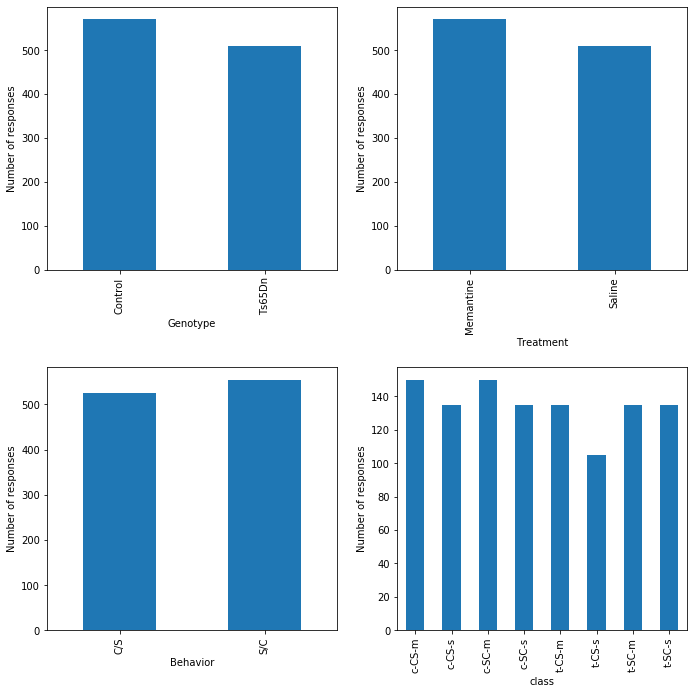

In [13]:
cols=['Genotype','Treatment','Behavior','class']
f = plt.figure(figsize=(10,10))
y=1

for x in cols:
    ax = f.add_subplot(2,2,y)
    y=y+1
    
    a=df[x].value_counts().sort_index()
    a.plot(kind='bar')
    plt.ylabel('Number of responses')
    plt.xlabel(x)
    f.tight_layout(pad=2.0)

Analysis of each protein column is different for each one and they are shown below.

Protein `pCREB_N` has median of 0.215 and it is equally distrbuted values. Upper and lower portion of box plot shows that it has both low and high values.

Protein `pCAMKII_N` has median of 3.2 .It has more higher values than the lower values and there are no outliers in this protein. All values lie in the range.


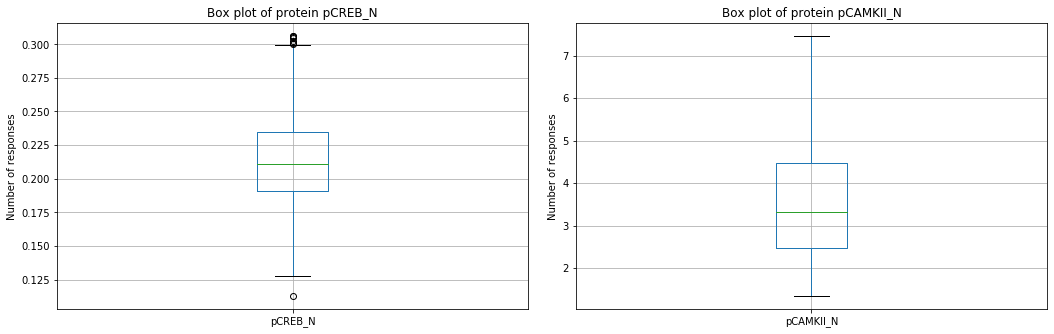

In [14]:
cols=['pCREB_N', 'pCAMKII_N'] 
f = plt.figure(figsize=(15,5))
y=1

for x in cols:
    ax = f.add_subplot(1,2,y)
    y=y+1
    df.boxplot(column=x)
    plt.ylabel('Number of responses')
    plt.title("Box plot of protein "+x)
    f.tight_layout(pad=2.0)   

Protein `pNR2B_N` has median of 1.7 and it is equally distrbuted values. Upper and lower portion of box plot shows that it has both low and high values.

Protein `PKCA_N` has median of 0.32 .It has more higher values than the lower values and there are few valid outliers in this protein.


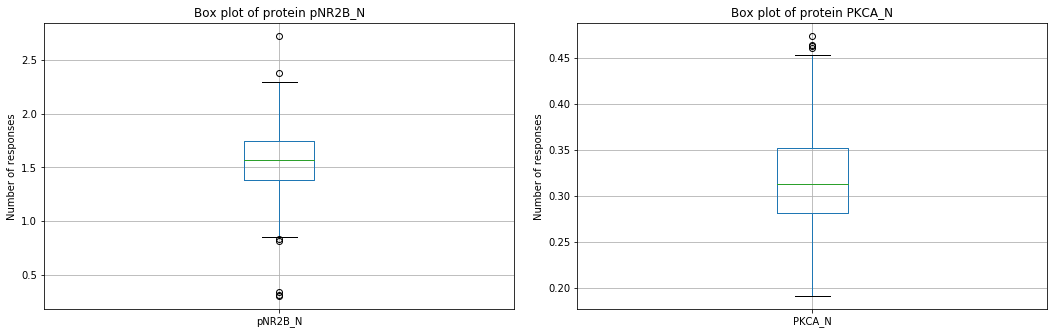

In [15]:
cols=['pNR2B_N', 'PKCA_N'] 

f = plt.figure(figsize=(15,5))
y=1

for x in cols:
    ax = f.add_subplot(1,2,y)
    y=y+1
    df.boxplot(column=x)
    plt.ylabel('Number of responses')
    plt.title("Box plot of protein "+x)
    f.tight_layout(pad=2.0)   

Protein `pPKCAB_N` has median of 1.4 .It has more higher values than the lower values and there are few valid outliers in this protein.

Protein `Bcatenin_N` has median of 2.2 .It has almost equal values of higher and the lower values and there are few valid outliers in this protein.

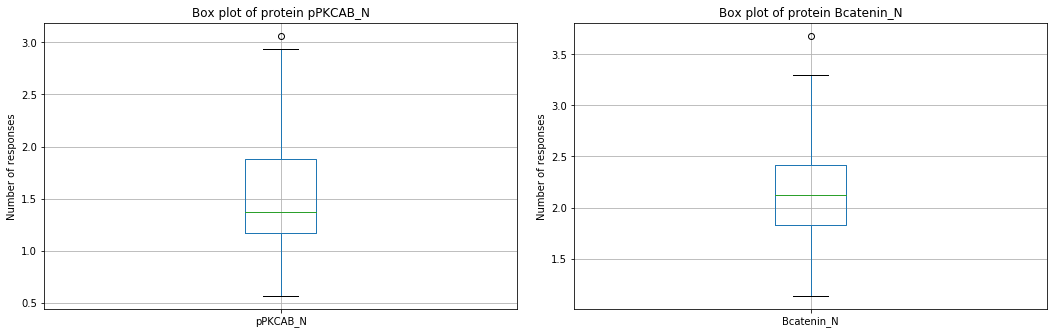

In [16]:
cols=['pPKCAB_N', 'Bcatenin_N'] 

f = plt.figure(figsize=(15,5))
y=1

for x in cols:
    ax = f.add_subplot(1,2,y)
    y=y+1
    df.boxplot(column=x)
    plt.ylabel('Number of responses')
    plt.title("Box plot of protein "+x)
    f.tight_layout(pad=2.0)   

Protein `NR1_N` has median of 2.25 .It has almost equal values of higher and the lower values and there are few valid outliers in this protein.
Protein `S6_N` has median of 2.2 .It has more higher values than the lower values and there are few valid outliers in this protein.

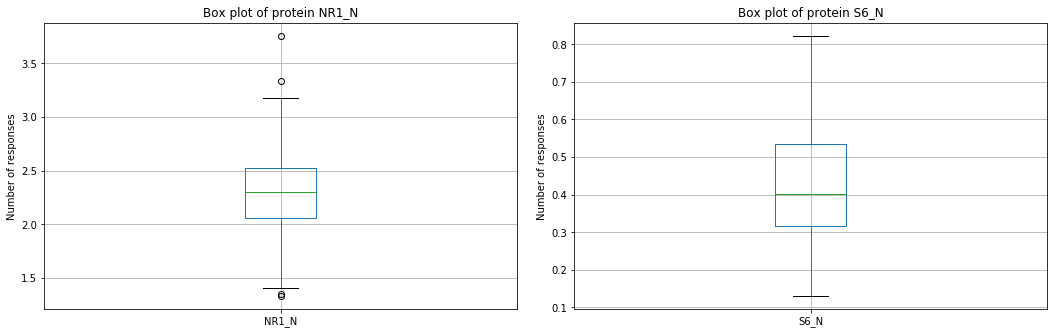

In [17]:
cols=['NR1_N', 'S6_N'] 

f = plt.figure(figsize=(15,5))
y=1

for x in cols:
    ax = f.add_subplot(1,2,y)
    y=y+1
    df.boxplot(column=x)
    plt.ylabel('Number of responses')
    plt.title("Box plot of protein "+x)
    f.tight_layout(pad=2.0)   

## Exploring the relationship between pairs of Attributes

* Hypothesis-1: In fig 1, Genotype of control mice median is more than trisomy mice for the protein pCAMKII_N . From the figure we cannot get the evidence as they seem to be equal. So, we reject the hypothesis.
* Hypothesis-2: In fig 2, Genotype value of control mice more than Trisomy mice for protein pPKCAB_N. From the figure 2 we accept the hypothesis.

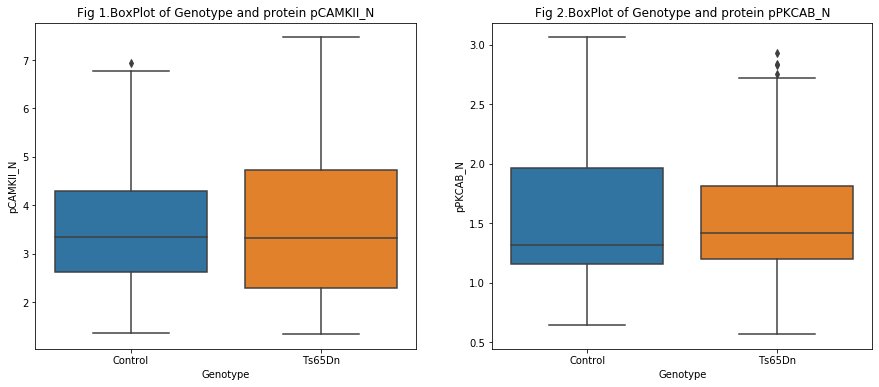

In [18]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Genotype'], df['pCAMKII_N'], ax=ax[0]).set_title("Fig 1.BoxPlot of Genotype and protein pCAMKII_N");
sns.boxplot(df['Genotype'], df['pPKCAB_N'], ax=ax[1]).set_title("Fig 2.BoxPlot of Genotype and protein pPKCAB_N");

* Hypothesis-3: In fig 3, Genotype of value of control mice is less than trisomy mice for the protein S6_N . From the figure we can see that it is true hence we accept the hypothesis.
* Hypothesis-4: In fig 4, Treatment by Memantime value is less than the saline for the protein pCAMKII_N. From the figure we can see that it is not true hence we reject the hypothesis.


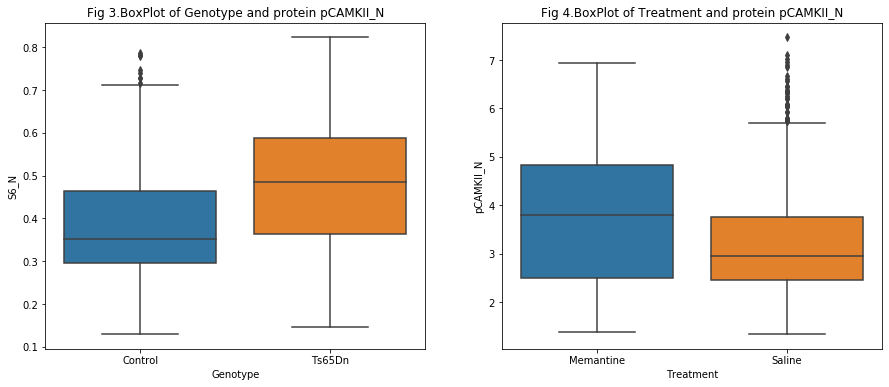

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Genotype'], df['S6_N'], ax=ax[0]).set_title("Fig 3.BoxPlot of Genotype and protein pCAMKII_N");
sns.boxplot(df['Treatment'], df['pCAMKII_N'], ax=ax[1]).set_title("Fig 4.BoxPlot of Treatment and protein pCAMKII_N");

* Hypothesis-5: In fig 5, Treatment by Memantime value is less than than the saline for the protein pPKCAB_N which is true from the figure so, we accept the hypothesis.
* Hypothesis-6: In fig 6, Treatment by Memantime value is less than than the saline for the protein S6_N. From the figure we can confirm that it is true hence we accept the hypothesis.

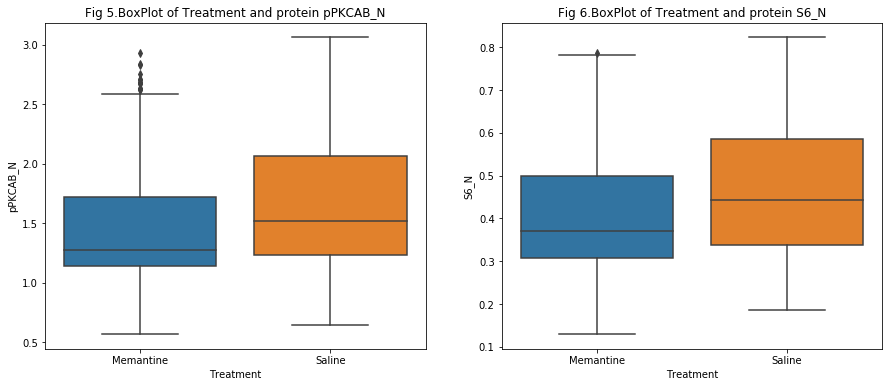

In [20]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Treatment'], df['pPKCAB_N'], ax=ax[0]).set_title("Fig 5.BoxPlot of Treatment and protein pPKCAB_N");
sns.boxplot(df['Treatment'], df['S6_N'], ax=ax[1]).set_title("Fig 6.BoxPlot of Treatment and protein S6_N");

* Hypothesis-7:In fig 7, Behavior of context-shock mice is less than the shock-context mice as the protein pCAMKII_N increases.
* Hypothesis-8:In fig 8, Behavior of context-shock mice is more than the shock-context mice as the protein pPKCAB_N increases.

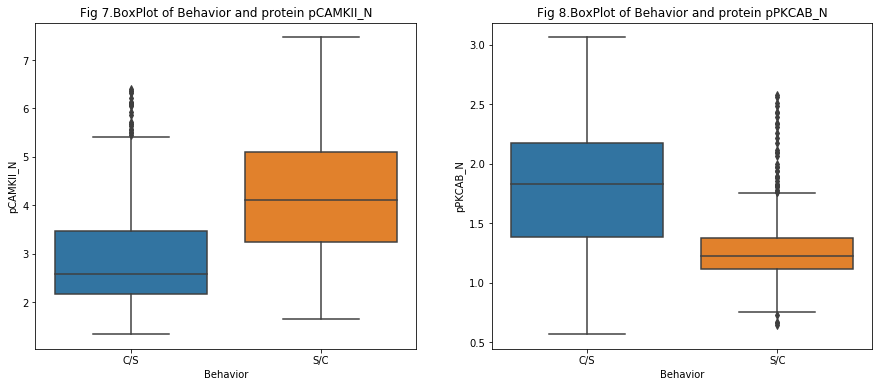

In [21]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(df['Behavior'], df['pCAMKII_N'], ax=ax[0]).set_title("Fig 7.BoxPlot of Behavior and protein pCAMKII_N");
sns.boxplot(df['Behavior'], df['pPKCAB_N'], ax=ax[1]).set_title("Fig 8.BoxPlot of Behavior and protein pPKCAB_N");

* Hypothesis-9:In fig 9, Behavior of context-shock mice is more than the shock-context as the protein S6_N increases.
* Hypothesis-10:In fig 10, trisomy mice, stimulated to learn, injected with saline is more than any other classes as the protein pCAMKII_N increases. 

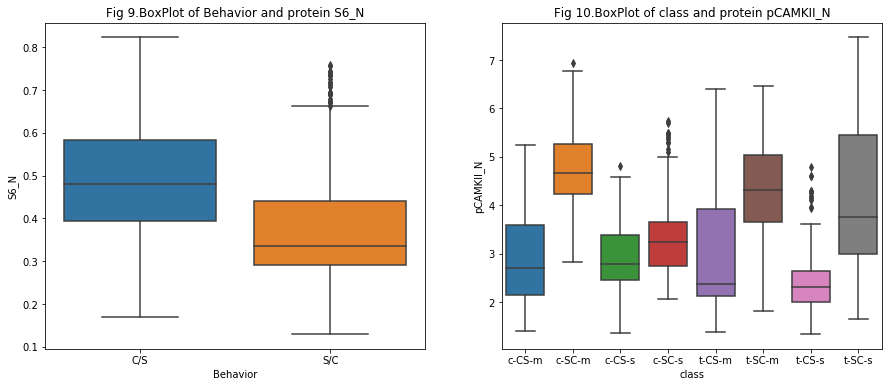

In [22]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(df['Behavior'], df['S6_N'], ax=ax[0]).set_title("Fig 9.BoxPlot of Behavior and protein S6_N");
sns.boxplot(df['class'], df['pCAMKII_N'], ax=ax[1]).set_title("Fig 10.BoxPlot of class and protein pCAMKII_N");


* Hypothesis-11:In fig 11, trisomy mice, stimulated to learn, injected with saline is more than any other classes as the protein pCAMKII_N increases.
* Hypothesis-12:In fig 12, control mice, stimulated to learn, injected with saline mean  is more than any other classes as the protein S6_N increases.

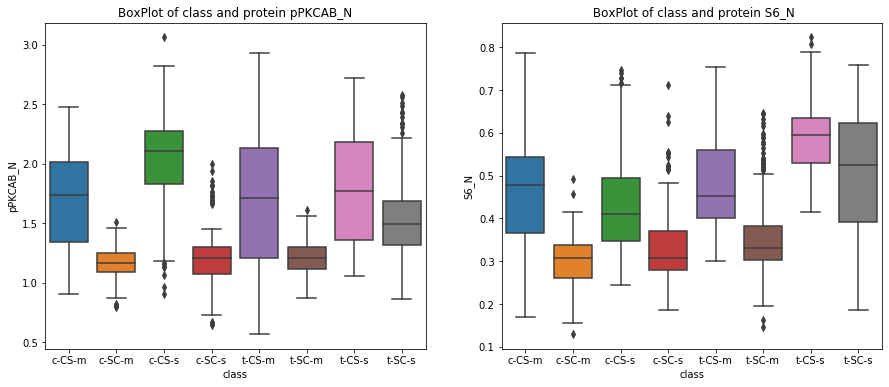

In [23]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(df['class'], df['pPKCAB_N'], ax=ax[0]).set_title("BoxPlot of class and protein pPKCAB_N");
sns.boxplot(df['class'], df['S6_N'], ax=ax[1]).set_title(" BoxPlot of class and protein S6_N");

Here dropping the three columns which combines to form the target variable. So it is considered as redundant which is not useful for our analysis.

In [24]:
df = df.drop(columns=['Genotype','Treatment','Behavior'])

In [25]:
df.shape

(1080, 78)

In [26]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0

### Splitting of target 
Splitting the column `class` from the rest of the data and is named as target and the rest of the data is named as `Data`.

In [27]:
Data = df.drop(columns = 'class')
target = df['class']


**Encoding** the target feature. In this step target step is manually encoded as shown in the below defined dictionary and it is mapped respectively.

In [28]:
Dict1 = {
    'c-CS-m':0,
    'c-SC-m':1,
    'c-CS-s':2,
    'c-SC-s':3,
    't-CS-m':4,
    't-SC-m':5,
    't-CS-s':6,
    't-SC-s':7
}
df['class']=df['class'].map(Dict1)

The entire data except target is scaled using MinMax scaler make the data uniform which varies between 0 and 1.

In [29]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [30]:
#the final preprocessed data is assigned to data_pre variable.
data_pre=pd.DataFrame(Data,columns=Data_df.columns)

In [31]:
#displaying the preprocessed data 
pd.DataFrame(Data, columns=Data_df.columns).head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,0.245702,0.215008,0.299172

## Data Modelling

Test and Train data is splitted in this step by using the function mention in the below step. Here test_size=0.4 means that proportion of test data included in the split  with random state 0 to ensure the same set of sample combination of data is used further.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data,target,test_size=0.4,random_state=0)


## Model Fitting<br>K Nearest Neighbour Classifier
### Fitting the KNN model with default parameters to check the accuracy of the prediction for the dataset.

In [33]:
# Importing the necessary packages for fitting the model and to check accuracy.

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

* KNN with default parameter has 5 neighbours. Classifier is fitted with the training data and training target.
* Once the model is trained then it is used to predict the test target based on the train target. Once the model is fitted completely then by using confusion matrix we will analyse the results of the classifier. If the diagonal elements in the matrix has the highest number for that corresponding column then we can say that model is performing well or else we need to tune the model to increase the accuracy. After this we will check the classification report for final report. 

In [34]:
clf = KNeighborsClassifier()   
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)  

cm = confusion_matrix(y_test, y_pre)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[58  0  0  0  0  0  0  0]
 [ 2 48  0  0  0  3  0  0]
 [ 0  0 60  2  0  0  0  0]
 [ 0  0  3 54  0  0  1  0]
 [ 9  0  0  0 49  0  0  1]
 [ 2  0  0  0  1 40  0  0]
 [ 0  0  2  0  0  0 44  0]
 [ 0  0  1  0  0  0  0 52]]


From the classification report we can see that we achieved 94% accuracy with default parameters.

In [35]:
print('Classification Report:\n\n',classification_report(y_test,y_pre))

Classification Report:

               precision    recall  f1-score   support

      c-CS-m       0.82      1.00      0.90        58
      c-CS-s       1.00      0.91      0.95        53
      c-SC-m       0.91      0.97      0.94        62
      c-SC-s       0.96      0.93      0.95        58
      t-CS-m       0.98      0.83      0.90        59
      t-CS-s       0.93      0.93      0.93        43
      t-SC-m       0.98      0.96      0.97        46
      t-SC-s       0.98      0.98      0.98        53

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432



## Tuning of KNN Model 

Initially we start with 1 neighbour with `weights as uniform`. we are achieving 99% of accuracy. If we increase the neighbours it might overfit the model. For 1 and 2 neighbour with weights as `uniform` and `distance` we are getting the same accuracy.

In [36]:
clf1 = KNeighborsClassifier(2, weights='distance')   #tuning at K=2, weights=distance
fit = clf1.fit(X_train, y_train)

y_pre = fit.predict(X_test)  

cm = confusion_matrix(y_test, y_pre)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[58  0  0  0  0  0  0  0]
 [ 1 52  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 1  1  0  0 56  1  0  0]
 [ 0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 53]]


In [37]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.97      1.00      0.98        58
      c-CS-s       0.98      0.98      0.98        53
      c-SC-m       1.00      0.98      0.99        62
      c-SC-s       0.98      1.00      0.99        58
      t-CS-m       1.00      0.95      0.97        59
      t-CS-s       0.98      1.00      0.99        43
      t-SC-m       1.00      1.00      1.00        46
      t-SC-s       1.00      1.00      1.00        53

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



## Hill Climbing Feature Selector for KNN
Here we are selecting the best features for the KNN algorithm in the entire dataset using the Hill Climbing technique.
The best featuers are selected based on the score until the maximum score is obtained for the number of columns. once the maximum possible score is obtained then those features indexes are obtained in the list from which we form one dataset and it is used to train the model for best score with less features is always an advantage.


In [38]:
from sklearn.utils import shuffle
new_Ind = []

cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.16435185185185186
Score with 2 selected features: 0.2222222222222222
Score with 3 selected features: 0.30092592592592593
Score with 4 selected features: 0.4027777777777778
Score with 5 selected features: 0.5300925925925926
Score with 6 selected features: 0.5763888888888888
Score with 7 selected features: 0.6412037037037037
Score with 8 selected features: 0.6504629629629629
Score with 9 selected features: 0.6967592592592593
Score with 10 selected features: 0.7245370370370371
Score with 11 selected features: 0.7939814814814815
Score with 12 selected features: 0.8356481481481481
Score with 13 selected features: 0.8680555555555556
Score with 14 selected features: 0.8819444444444444
Score with 15 selected features: 0.9236111111111112
Score with 16 selected features: 0.9236111111111112
Score with 17 selected features: 0.9305555555555556
Score with 18 selected features: 0.9375
Score with 19 selected features: 0.9467592592592593
Score with 20 selected features

Here 33 features giving maximum score. So we are taking those 33 features and fitting them on the KNN model to get the accuracy. 

In [39]:
print("There are " + str(len(new_Ind)) + " features selected:")
print([new_Ind])

There are 33 features selected:
[[31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 34, 71, 46, 15, 45, 19, 76, 63, 62, 55, 67, 68, 39, 69, 73, 66, 28, 42, 60, 20, 12]]


In [40]:
data_fea=data_pre.iloc[:,new_Ind]
print(data_fea.shape)
data_fea.head()

(1080, 33)


,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,GFAP_N,pERK_N,ARC_N,P38_N,pCFOS_N,pPKCG_N,pNR2A_N,pGSK3B_N,AKT_N,CaNA_N,PSD95_N,pCASP9_N,nNOS_N,SHH_N,BAD_N,pNUMB_N,BCL2_N,H3AcK18_N,pGSK3B_Tyr216_N,TRKA_N,pP70S6_N,IL1B_N,BRAF_N,PKCA_N
0,0.747441,0.323059,0.640167,0.102890,0.531163,0.151103,0.169702,0.327870,0.553922,0.228825,0.157643,0.426816,0.152338,0.133930,0.303363,0.286697,0.604516,0.711198,0.705738,0.483783,0.432843,0.477834,0.162941,0.177312,0.469461,0.299172,0.087715,0.405228,0.766146,0.163368,0.242608,0.136915,0.747688
1,0.701976,0.322736,0.614355,0.115874,0.576828,0.149555,0.212421,0.326426,0.512117,0.251911,0.159721,0.429952,0.137451,0.110434,0.302059,0.270688,0.618918,0.689095,0.749771,0.477640,0.472327,0.488028,0.220010,0.146494,0.410046,0.299172,0.080692,0.433471,0.724593,0.145594,0.285860,0.128911,0.688545
2,0.710718,0.334325,0.625756,0.109050,0.607535,0.150434,0.202733,0.312439,0.510175,0.248192,0.154554,0.448652,0.137475,0.121560,0.332565,0.283848,0.657565,0.670907,0.868229,0.484953,0.467603,0.475009,0.186816,0.155920,0.400225,0.299172,0.080465,0.429387,0.730384,0.125773,0.373879,0.128651,0.670905
3,0.536330,0.220414,0.625528,0.164241,0.562594,0.156083,0.184790,0.338264,0.514305,0.245676,0.127028,0.392700,0.144945,0.151031,0.364189,0.211238,0.549444,0.593408,0.721879,0.449304,0.364359,0.397939,0.179047,0.229602,0.406715,0.299172,0.126763,0.407971,0.667283,0.267936,0.242672,0.121509,0.657048
4,0.519186,0.212521,0.599623,0.136298,0.656300,0.147044,0.187625,0.330219,0.501294,0.234762,0.117572,0.410187,0.121261,0.147711,0.376199,0.200364,0.559551,0.557701,0.812053,0.480334,0.393332,0.422195,0.245702,0.215008,0.372548,0.299172,0.096959,0.480342,0.627685,0.262839,0.325597,0.112407,0.608970


## Fitting with Feature Selection for default KNN

Now with those 33 features the data is split in to train and test in the ration of 0.4 with random state 0.
Now the splitted data is fitted again to the default KNN and the accuracy is tested on the target. 
From the below classification results we can see that acuuracy is 94% which very good with 33 features only. Here we could achieve pretty good result with only 33 features.

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_fea,target,test_size=0.4,random_state=0)
clf = KNeighborsClassifier(5)   
fit = clf.fit(X_train1, y_train1)

y_pre1 = fit.predict(X_test1) 

cm = confusion_matrix(y_test1, y_pre1)
print('Confusion Matrix:\n',cm)


Confusion Matrix:
 [[57  0  0  0  0  0  0  1]
 [ 0 50  0  0  2  1  0  0]
 [ 0  0 59  3  0  0  0  0]
 [ 0  0  8 49  0  0  1  0]
 [ 5  1  0  0 52  1  0  0]
 [ 2  1  0  0  0 40  0  0]
 [ 0  0  1  1  0  0 44  0]
 [ 0  0  0  0  0  0  0 53]]


In [42]:
print(classification_report(y_test1,y_pre1))

              precision    recall  f1-score   support

      c-CS-m       0.89      0.98      0.93        58
      c-CS-s       0.96      0.94      0.95        53
      c-SC-m       0.87      0.95      0.91        62
      c-SC-s       0.92      0.84      0.88        58
      t-CS-m       0.96      0.88      0.92        59
      t-CS-s       0.95      0.93      0.94        43
      t-SC-m       0.98      0.96      0.97        46
      t-SC-s       0.98      1.00      0.99        53

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.93       432



## Fitting with Feature Selection for tuned KNN

Now after getting 94% for default KNN, now its parameters are tuned to check the accuracy of the model for 33 features selected by Hill Climbing technique.
Here Knn with 2 neighbours and weights as distance is giving almost 100% accuracy. This is an excellent accuracy for just 33 features out of 82 features in the entire dataset.

In [43]:
clf = KNeighborsClassifier(2, weights='distance')   #tuning at K=2, weights=distance
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)  

cm = confusion_matrix(y_test, y_pre)
print('Confusion Matrix:\n',cm)


Confusion Matrix:
 [[58  0  0  0  0  0  0  0]
 [ 0 52  0  0  1  0  0  0]
 [ 0  0 61  1  0  0  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 53]]


In [44]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        58
      c-CS-s       1.00      0.98      0.99        53
      c-SC-m       1.00      0.98      0.99        62
      c-SC-s       0.98      1.00      0.99        58
      t-CS-m       0.98      1.00      0.99        59
      t-CS-s       1.00      1.00      1.00        43
      t-SC-m       1.00      1.00      1.00        46
      t-SC-s       1.00      1.00      1.00        53

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



## Decision Tree

Now Decision tree classifier is used to predict the target. Here the same train and test data is used which was used for the default KNN classifier. 
Now train data is fitted to the model with the default parameters of the decision tree. After fitting the training data, now model is used to predict the target. Now from the confusion matrix we can observe that diagonal values are much higher than others in that particular rows, which means that it is performing well. After getting the classification report we can see that it is giving the accuracy of 78% which is not bad.

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
 
cm = confusion_matrix(y_test, y_pre)
print('Confusion Matrix:\n',cm)
print(classification_report(y_test,y_pre))

Confusion Matrix:
 [[48  7  0  0  1  2  0  0]
 [ 4 36  5  0  3  4  0  1]
 [ 1  0 53  0  0  0  7  1]
 [ 0  1  2 47  0  0  7  1]
 [ 4  3  0  0 51  1  0  0]
 [ 2  6  0  0  4 30  1  0]
 [ 2  2  7  7  0  0 27  1]
 [ 3  2  3  1  0  0  0 44]]
              precision    recall  f1-score   support

      c-CS-m       0.75      0.83      0.79        58
      c-CS-s       0.63      0.68      0.65        53
      c-SC-m       0.76      0.85      0.80        62
      c-SC-s       0.85      0.81      0.83        58
      t-CS-m       0.86      0.86      0.86        59
      t-CS-s       0.81      0.70      0.75        43
      t-SC-m       0.64      0.59      0.61        46
      t-SC-s       0.92      0.83      0.87        53

    accuracy                           0.78       432
   macro avg       0.78      0.77      0.77       432
weighted avg       0.78      0.78      0.78       432



Now the decision tree is tuned with parameters to get the maximum efficiency. Tuning is done by varying the max_depth from 0 to 11 and min_samples_splits from 0 to 10, with criterions as `entropy` and `ginni`. After testing all the combinations we found that it is giving maximum accuracy for entropy with max_depth=11 and samples_splits=3.
From the classification report we can see that it is giving 81% after tuning.

In [46]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_split=3)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
 
cm = confusion_matrix(y_test, y_pre)
print('Confusion Matrix:\n',cm)
print("Classification Report:\n",classification_report(y_test,y_pre))

Confusion Matrix:
 [[50  7  0  0  0  0  1  0]
 [ 6 36  1  0  5  5  0  0]
 [ 0  0 53  1  0  0  8  0]
 [ 0  0  1 51  0  0  6  0]
 [ 8  4  0  0 46  1  0  0]
 [ 6  0  0  0  4 33  0  0]
 [ 1  1  3  3  0  0 36  2]
 [ 3  0  2  3  0  1  1 43]]
Classification Report:
               precision    recall  f1-score   support

      c-CS-m       0.68      0.86      0.76        58
      c-CS-s       0.75      0.68      0.71        53
      c-SC-m       0.88      0.85      0.87        62
      c-SC-s       0.88      0.88      0.88        58
      t-CS-m       0.84      0.78      0.81        59
      t-CS-s       0.82      0.77      0.80        43
      t-SC-m       0.69      0.78      0.73        46
      t-SC-s       0.96      0.81      0.88        53

    accuracy                           0.81       432
   macro avg       0.81      0.80      0.80       432
weighted avg       0.81      0.81      0.81       432



## Hill Climbing for Decision Tree

Now best features for the decision tree is obtained from the Hill Climbing technique. We can found that Hill climbing technique choosed 27 charaters as it is giving maximum score.

In [47]:
from sklearn.utils import shuffle
new_Ind = []

cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.1597222222222222
Score with 2 selected features: 0.22916666666666666
Score with 3 selected features: 0.25462962962962965
Score with 4 selected features: 0.3101851851851852
Score with 5 selected features: 0.41203703703703703
Score with 6 selected features: 0.4236111111111111
Score with 7 selected features: 0.45601851851851855
Score with 8 selected features: 0.4652777777777778
Score with 9 selected features: 0.4699074074074074
Score with 10 selected features: 0.6273148148148148
Score with 11 selected features: 0.6712962962962963
Score with 12 selected features: 0.6805555555555556
Score with 13 selected features: 0.7222222222222222
Score with 14 selected features: 0.7291666666666666
Score with 15 selected features: 0.7986111111111112
Score with 16 selected features: 0.7986111111111112
Score with 17 selected features: 0.8009259259259259
Score with 18 selected features: 0.8009259259259259
Score with 19 selected features: 0.8032407407407407
Score with 20 sel

Indices of those 27 features are obtained in the list and respective column is obtained from the data set and it is used for futher analysis.

In [48]:
print("There are " + str(len(new_Ind)) + " features selected:")
print([new_Ind])

There are 27 features selected:
[[31, 43, 26, 74, 58, 59, 61, 51, 57, 10, 53, 34, 46, 15, 45, 62, 67, 52, 22, 41, 4, 60, 18, 50, 1, 16, 64]]


In [49]:
data_fea1=data_pre.iloc[:,new_Ind]
print(data_fea1.shape)
data_fea1.head()

(1080, 27)


,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,GFAP_N,pERK_N,ARC_N,P38_N,pPKCG_N,pNR2A_N,pGSK3B_N,pCASP9_N,SHH_N,BAX_N,CREB_N,TIAM1_N,NR2A_N,IL1B_N,pRSK_N,AcetylH3K9_N,ITSN1_N,pNR2B_N,SNCA_N
0,0.747441,0.323059,0.640167,0.102890,0.531163,0.151103,0.169702,0.327870,0.228825,0.157643,0.426816,0.152338,0.303363,0.286697,0.604516,0.432843,0.162941,0.690257,0.317149,0.506018,0.630482,0.242608,0.622784,0.083584,0.212885,0.650637,0.044770
1,0.701976,0.322736,0.614355,0.115874,0.576828,0.149555,0.212421,0.326426,0.251911,0.159721,0.429952,0.137451,0.302059,0.270688,0.618918,0.472327,0.220010,0.664894,0.291583,0.447496,0.585247,0.285860,0.629311,0.084514,0.188226,0.587926,0.054452
2,0.710718,0.334325,0.625756,0.109050,0.607535,0.150434,0.202733,0.312439,0.248192,0.154554,0.448652,0.137475,0.332565,0.283848,0.657565,0.467603,0.186816,0.700212,0.292676,0.432379,0.575910,0.373879,0.669753,0.094486,0.205696,0.590443,0.044526
3,0.536330,0.220414,0.625528,0.164241,0.562594,0.156083,0.184790,0.338264,0.245676,0.127028,0.392700,0.144945,0.364189,0.211238,0.549444,0.364359,0.179047,0.669358,0.319599,0.422989,0.480646,0.242672,0.687775,0.076248,0.157688,0.522319,0.119259
4,0.519186,0.212521,0.599623,0.136298,0.656300,0.147044,0.187625,0.330219,0.234762,0.117572,0.410187,0.121261,0.376199,0.200364,0.559551,0.393332,0.245702,0.686524,0.297196,0.374357,0.441977,0.325597,0.698127,0.079697,0.157838,0.486489,0.116965


After selecting the 27 important features for the decision tree classifier now we are fitting the model with the new 27 features dataset to check the accuracy.
* After fitting the model we can see get the accuracy of the 83% with default decision tree. 

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_fea1,target,test_size=0.4,random_state=0)
clf = DecisionTreeClassifier()  
fit1 = clf.fit(X_train1, y_train1)

y_pre1 = fit1.predict(X_test1) 

cm1 = confusion_matrix(y_test1, y_pre1)
print('Confusion Matrix:\n',cm1)
print(classification_report(y_test1,y_pre1))

Confusion Matrix:
 [[50  4  0  0  3  0  0  1]
 [ 7 36  2  0  2  3  0  3]
 [ 0  0 55  4  0  0  3  0]
 [ 1  0  3 52  0  0  1  1]
 [ 3  4  0  0 49  3  0  0]
 [ 1  4  2  0  3 33  0  0]
 [ 0  0  2  3  1  0 40  0]
 [ 2  1  1  3  0  1  1 44]]
              precision    recall  f1-score   support

      c-CS-m       0.78      0.86      0.82        58
      c-CS-s       0.73      0.68      0.71        53
      c-SC-m       0.85      0.89      0.87        62
      c-SC-s       0.84      0.90      0.87        58
      t-CS-m       0.84      0.83      0.84        59
      t-CS-s       0.82      0.77      0.80        43
      t-SC-m       0.89      0.87      0.88        46
      t-SC-s       0.90      0.83      0.86        53

    accuracy                           0.83       432
   macro avg       0.83      0.83      0.83       432
weighted avg       0.83      0.83      0.83       432



Here Decision tree parameters are tuned to get the maximum accuracy for those 27 features obtained from the hill climbing.
At max_depth=9, we are getting the maximum accuracy of 80%.

In [51]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9)  
fit1 = clf.fit(X_train1, y_train1)

y_pre1 = fit1.predict(X_test1) 

cm1 = confusion_matrix(y_test1, y_pre1)
print('Confusion Matrix:\n',cm1)
print(classification_report(y_test1,y_pre1))

Confusion Matrix:
 [[41  8  1  0  6  2  0  0]
 [ 6 39  4  0  1  2  0  1]
 [ 0  1 49  1  0  0 11  0]
 [ 0  0  7 47  0  0  3  1]
 [ 9  0  0  0 48  2  0  0]
 [ 1  1  0  0  5 35  0  1]
 [ 0  0  3  4  0  0 39  0]
 [ 0  3  0  0  0  1  1 48]]
              precision    recall  f1-score   support

      c-CS-m       0.72      0.71      0.71        58
      c-CS-s       0.75      0.74      0.74        53
      c-SC-m       0.77      0.79      0.78        62
      c-SC-s       0.90      0.81      0.85        58
      t-CS-m       0.80      0.81      0.81        59
      t-CS-s       0.83      0.81      0.82        43
      t-SC-m       0.72      0.85      0.78        46
      t-SC-s       0.94      0.91      0.92        53

    accuracy                           0.80       432
   macro avg       0.80      0.80      0.80       432
weighted avg       0.80      0.80      0.80       432



Finally Cross validation is done with 5 folds to check the accuracy accurately. with neighbours=2 we are almost getting 100% efficiency on average which indicates that our model is performing well.

In [52]:
#define classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(2)

In [53]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

In [54]:
#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(data_fea)):
 
    X_train, X_test = data_fea.iloc[train_index], data_fea.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.99074
[fold 1] score: 0.99074
[fold 2] score: 1.00000
[fold 3] score: 1.00000
[fold 4] score: 1.00000


Cross validation with 5 folds is done for decision tree with criterion= entropy, it is giving almost 82% average which is quite good.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = DecisionTreeClassifier(criterion="entropy")
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)
for k, (train_index, test_index) in enumerate(kf.split(data_fea)):
 
    X_train, X_test = data_fea.iloc[train_index], data_fea.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.85185
[fold 1] score: 0.83796
[fold 2] score: 0.84722
[fold 3] score: 0.79167
[fold 4] score: 0.75463


### Conclusion

* For the classification of the Mice Dataset we found that KNN model with tuned parameters is giving almost 100% accuracy than the decision tree which is giving almost 82% on average. 
* So we recommend tuned KNN model with feature selection done by Hill Climbing technique.